# Exporatory data analysis of the subset of data

In [1]:
import string
import warnings
from pathlib import Path

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import seaborn as sns

warnings.simplefilter(action="ignore", category=UserWarning)

gg.theme_set(gg.theme_minimal())

RANDOM_SEED = 927
np.random.seed(RANDOM_SEED)

In [2]:
data_path = Path("../modeling_data/depmap_modeling_dataframe_subsample.csv")
data = pd.read_csv(data_path)
data.head(n=10)

,sgrna,replicate_id,lfc,pdna_batch,passes_qc,depmap_id,primary_or_metastasis,lineage,lineage_subtype,kras_mutation,...,log2_gene_cn_p1,gene_cn,n_muts,any_deleterious,variant_classification,is_deleterious,is_tcga_hotspot,is_cosmic_hotspot,mutated_at_guide_location,rna_expr
0,AAGAGGCCGGTCAAATTCAG,42-mg-ba-311cas9_repa_p6_batch3,-0.405499,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,0.845287,1.328646,0,False,NaN,NaN,NaN,NaN,False,1.263034
1,AATCAACCCACAGCTGCACA,42-mg-ba-311cas9_repa_p6_batch3,-0.133541,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,0.827398,1.287359,2,False,missense_mutation;missense_mutation,FALSE;FALSE,TRUE;TRUE,TRUE;TRUE,False,5.220330
2,AATTACTACTTGCTTCCTGT,42-mg-ba-311cas9_repa_p6_batch3,-0.491495,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,0.879280,1.409165,0,False,NaN,NaN,NaN,NaN,False,3.008989
3,ACCTGTATGACGAAACCGTG,42-mg-ba-311cas9_repa_p6_batch3,-0.015850,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,0.818549,1.267208,0,False,NaN,NaN,NaN,NaN,False,4.083213
4,ACTCTGTTCCTTCATCTCCG,42-mg-ba-311cas9_repa_p6_batch3,-0.530277,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,0.990378,1.692253,0,False,NaN,NaN,NaN,NaN,False,5.822730
5,ACTGCTGCGGGAATTCCAAG,42-mg-ba-311cas9_repa_p6_batch3,0.778827,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,0.818549,1.267208,0,False,NaN,NaN,NaN,NaN,False,4.083213
6,AGACACTTATACTATGAAAG,42-mg-ba-311cas9_repa_p6_batch3,0.035950,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,0.872323,1.392463,0,False,NaN,NaN,NaN,NaN,False,3.701549
7,AGAGGAGTACAGTGCAATGA,42-mg-ba-311cas9_repa_p6_batch3,0.370832,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,0.879280,1.409165,0,False,NaN,NaN,NaN,NaN,False,3.008989
8,AGATAGAGTAACTCTCTTTG,42-mg-ba-311cas9_repa_p6_batch3,-0.217851,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,1.024361,1.785314,0,False,NaN,NaN,NaN,NaN,False,1.748461
9,AGTGCGGATGAGTTTCAGCG,42-mg-ba-311cas9_repa_p6_batch3,-0.829300,3,True,ACH-000323,Primary,central_nervous_system,glioma,WT,...,0.990378,1.692253,0,False,NaN,NaN,NaN,NaN,False,5.822730


In [3]:
def make_cat(df, col, ordered=False):
    df[col] = pd.Categorical(df[col], ordered=ordered)
    return df

In [4]:
for col in [
    "pdna_batch",
    "sgrna",
    "depmap_id",
    "primary_or_metastasis",
    "lineage",
    "lineage_subtype",
    "kras_mutation",
]:
    data = make_cat(data, col)

In [5]:
print(
    f" num data points: {data.shape[0]}\n",
    f"      num genes: {len(set(data.hugo_symbol))}\n",
    f"      num sgRNA: {len(set(data.sgrna))}\n",
    f"   num lineages: {len(set(data.lineage))}\n",
    f" num cell lines: {len(set(data.depmap_id))}",
)

 num data points: 60049
       num genes: 26
       num sgRNA: 103
    num lineages: 5
  num cell lines: 258


In [6]:
data.columns

Index(['sgrna', 'replicate_id', 'lfc', 'pdna_batch', 'passes_qc', 'depmap_id',
       'primary_or_metastasis', 'lineage', 'lineage_subtype', 'kras_mutation',
       'genome_alignment', 'n_alignments', 'hugo_symbol', 'chromosome',
       'chrom_pos', 'segment_mean', 'segment_cn', 'log2_gene_cn_p1', 'gene_cn',
       'n_muts', 'any_deleterious', 'variant_classification', 'is_deleterious',
       'is_tcga_hotspot', 'is_cosmic_hotspot', 'mutated_at_guide_location',
       'rna_expr'],
      dtype='object')

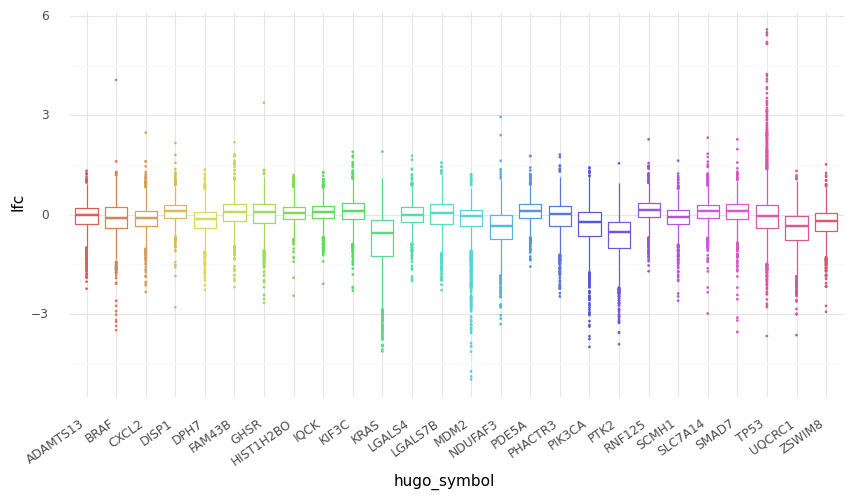

<ggplot: (8759140016336)>

In [7]:
(
    gg.ggplot(data, gg.aes(x="hugo_symbol", y="lfc", color="hugo_symbol"))
    + gg.geom_boxplot(outlier_size=0.1)
    + gg.scale_color_discrete(guide=False)
    + gg.theme(figure_size=(10, 5), axis_text_x=gg.element_text(angle=35, hjust=1))
)

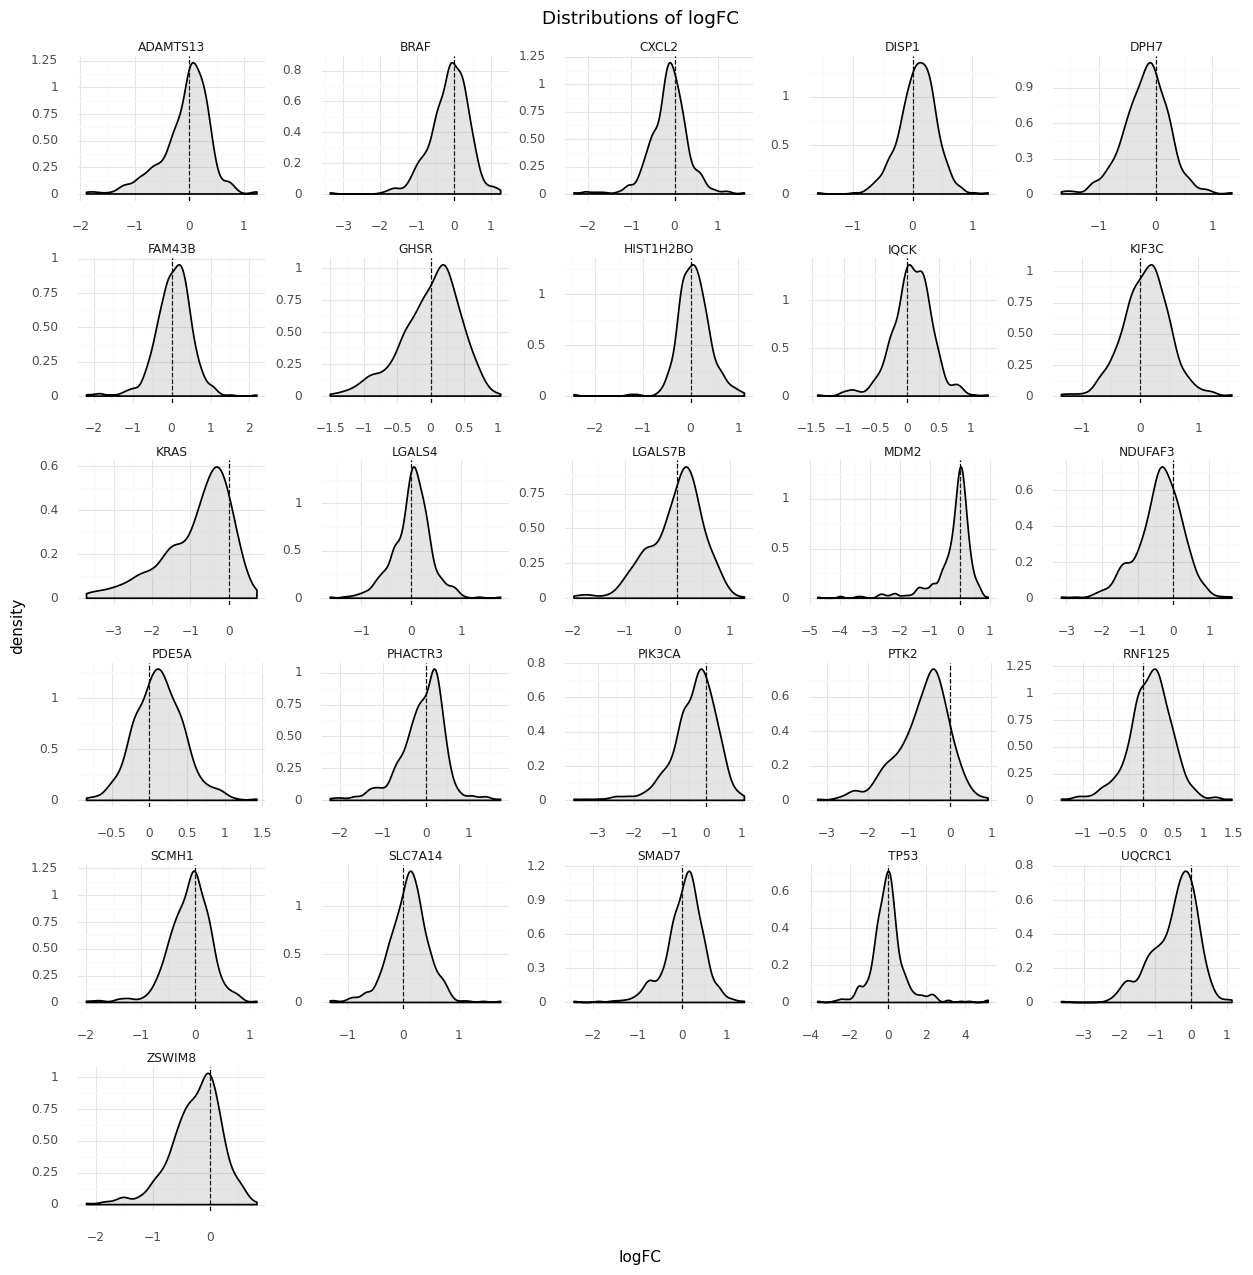

<ggplot: (8759138899080)>

In [8]:
faceting_theme_dict = {
    "figure_size": (15, 15),
    "subplots_adjust": {"hspace": 0.4, "wspace": 0.3},
}

(
    gg.ggplot(data, gg.aes(x="lfc"))
    + gg.facet_wrap("hugo_symbol", ncol=5, scales="free")
    + gg.geom_vline(xintercept=0, linetype="--", size=0.5, color="black")
    + gg.geom_density(size=0.7, color="black", fill="gray", alpha=0.2)
    + gg.theme(**faceting_theme_dict)
    + gg.labs(x="logFC", y="density", title="Distributions of logFC")
)

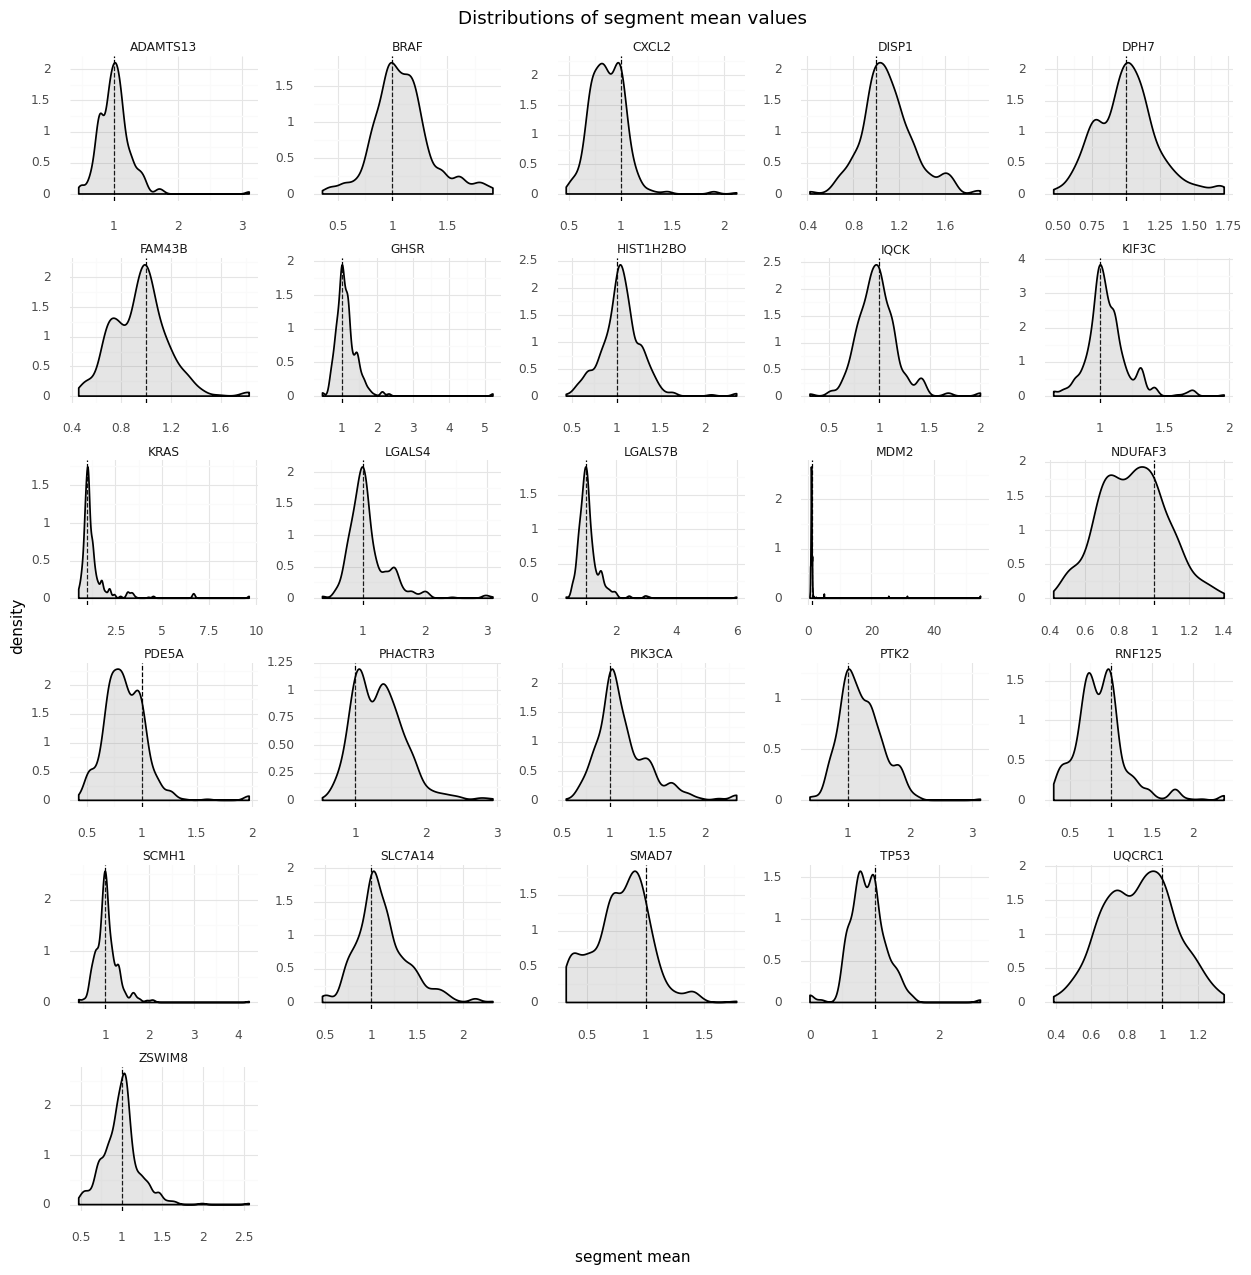

<ggplot: (8759129715788)>

In [9]:
(
    gg.ggplot(data, gg.aes(x="segment_mean"))
    + gg.facet_wrap("hugo_symbol", ncol=5, scales="free")
    + gg.geom_vline(xintercept=1, linetype="--", size=0.5, color="black")
    + gg.geom_density(size=0.7, color="black", fill="gray", alpha=0.2)
    + gg.theme(**faceting_theme_dict)
    + gg.labs(
        x="segment mean", y="density", title="Distributions of segment mean values"
    )
)

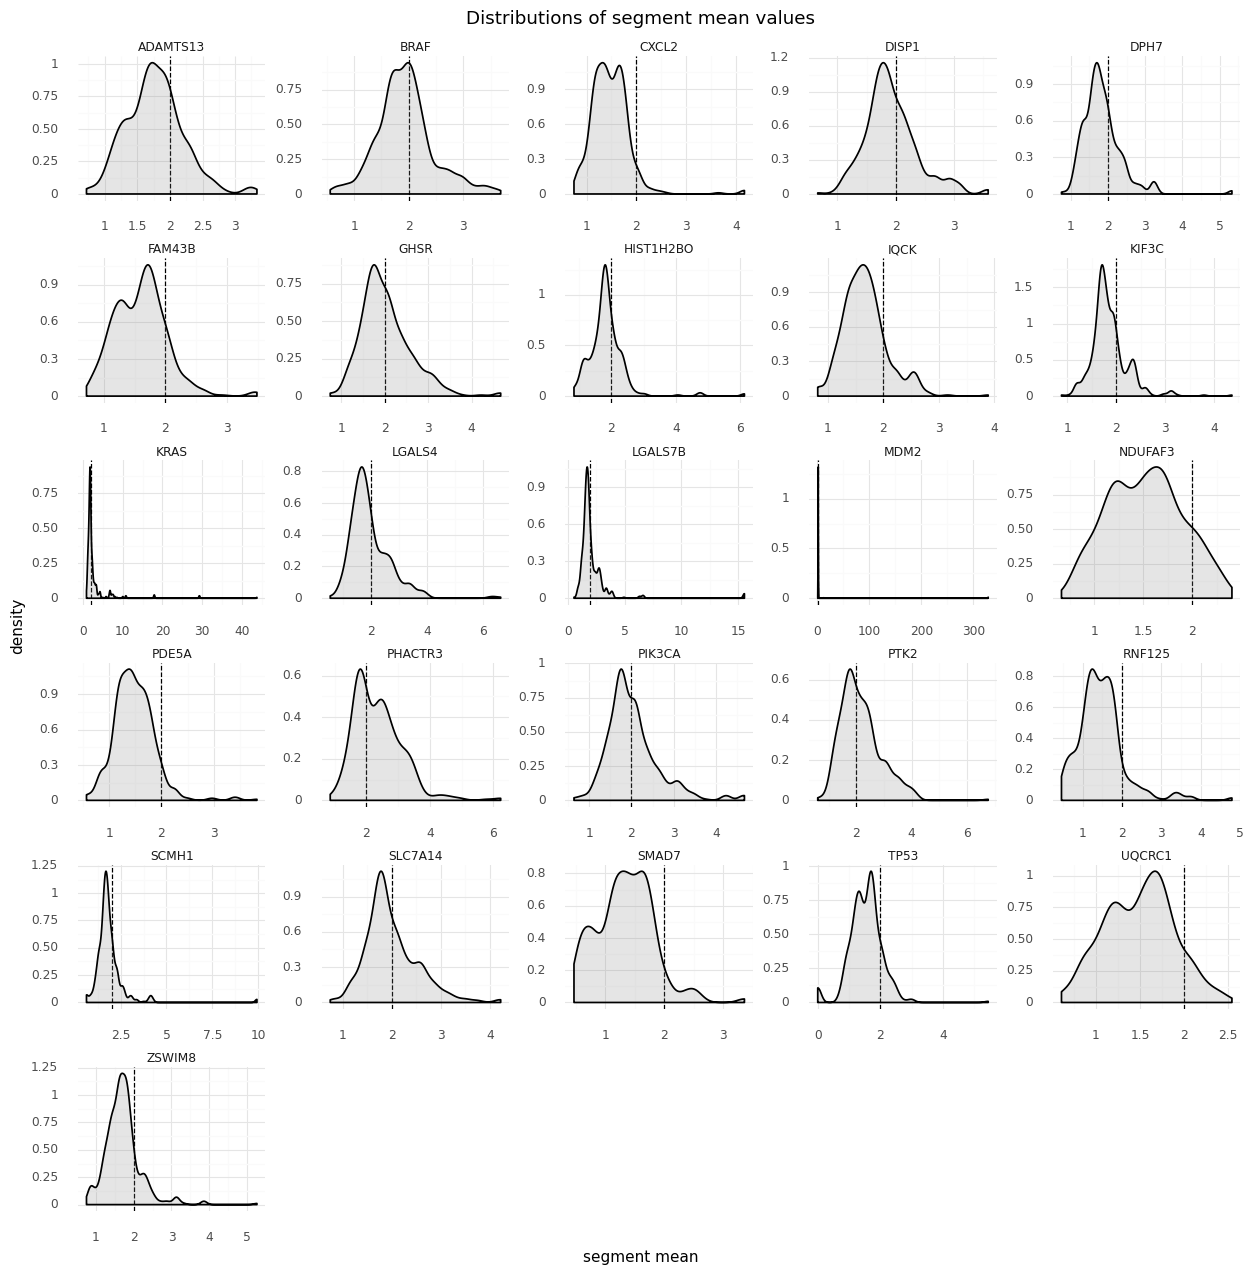

<ggplot: (8759130055159)>

In [12]:
(
    gg.ggplot(data, gg.aes(x="gene_cn"))
    + gg.facet_wrap("hugo_symbol", ncol=5, scales="free")
    + gg.geom_vline(xintercept=2, linetype="--", size=0.5, color="black")
    + gg.geom_density(size=0.7, color="black", fill="gray", alpha=0.2)
    + gg.theme(**faceting_theme_dict)
    + gg.labs(
        x="segment mean", y="density", title="Distributions of segment mean values"
    )
)

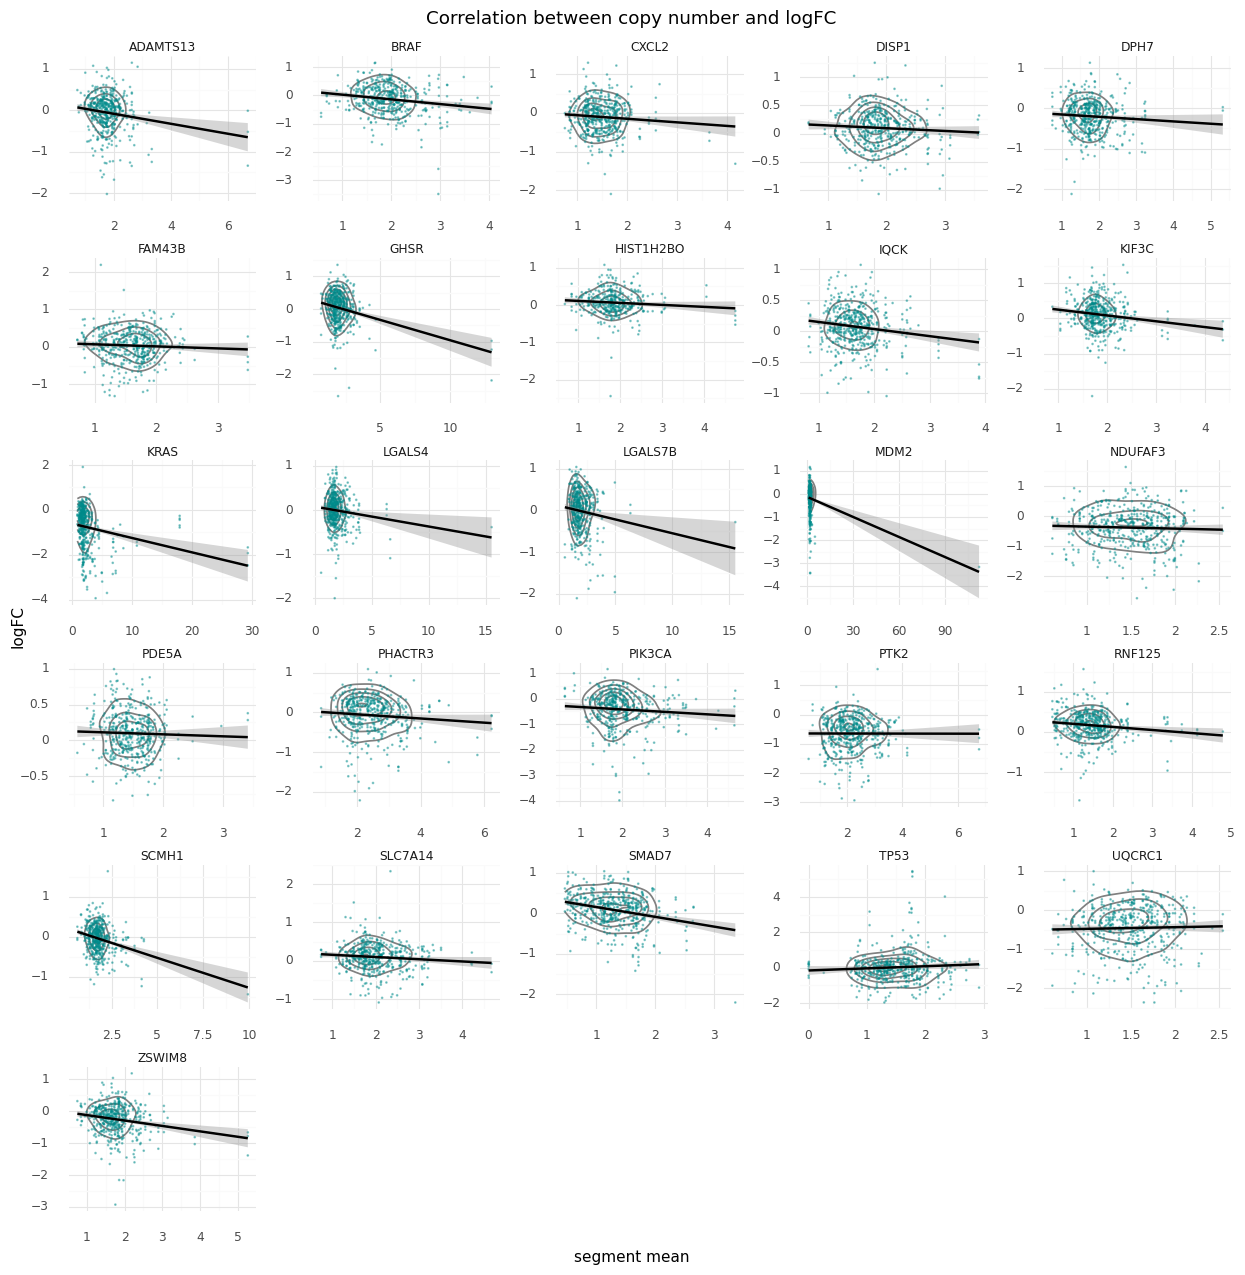

<ggplot: (8759122620064)>

In [15]:
(
    gg.ggplot(data, gg.aes(x="gene_cn", y="lfc"))
    + gg.facet_wrap("hugo_symbol", ncol=5, scales="free")
    + gg.geom_density_2d(color="grey", size=0.7)
    + gg.geom_point(color="darkcyan", alpha=0.4, size=0.1)
    + gg.geom_smooth(method="lm")
    + gg.theme(**faceting_theme_dict)
    + gg.labs(
        x="segment mean", y="logFC", title="Correlation between copy number and logFC"
    )
)

In [16]:
def plot_highlight_muts(df, x, y="lfc", x_label=None, y_label="logFC", title=""):
    """Scatter plot of data in `df` with the mutated samples highlighted."""
    if x_label == None:
        x_label = x

    return (
        gg.ggplot(df, gg.aes(x=x, y=y))
        + gg.facet_wrap("hugo_symbol", ncol=5, scales="free")
        + gg.geom_point(
            gg.aes(color="any_deleterious", alpha="any_deleterious"), size=0.2
        )
        + gg.geom_smooth(method="lm")
        + gg.scale_color_manual(values=["gray", "red"])
        + gg.scale_alpha_manual(values=[0.2, 0.8])
        + gg.theme(**faceting_theme_dict)
        + gg.labs(
            x=x_label,
            y=y_label,
            color="any deleterious",
            title=title,
        )
    )

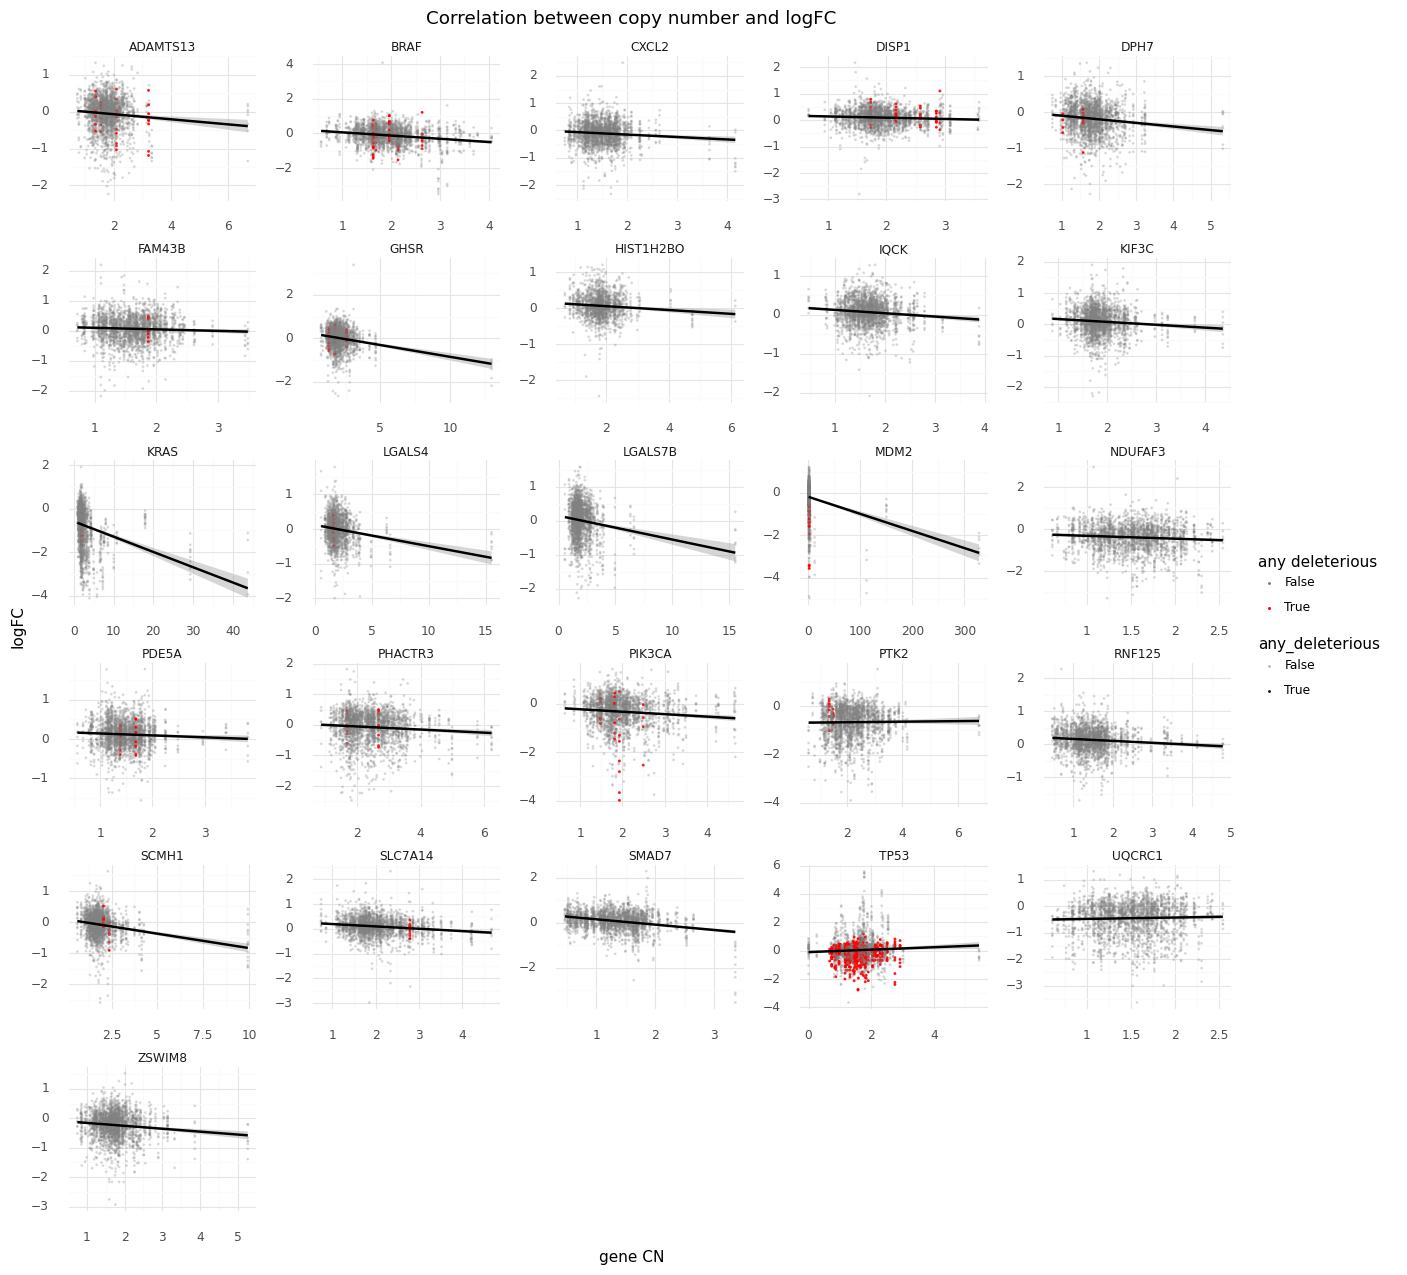

<ggplot: (8759129289265)>

In [17]:
plot_highlight_muts(
    data,
    x="gene_cn",
    x_label="gene CN",
    title="Correlation between copy number and logFC",
)

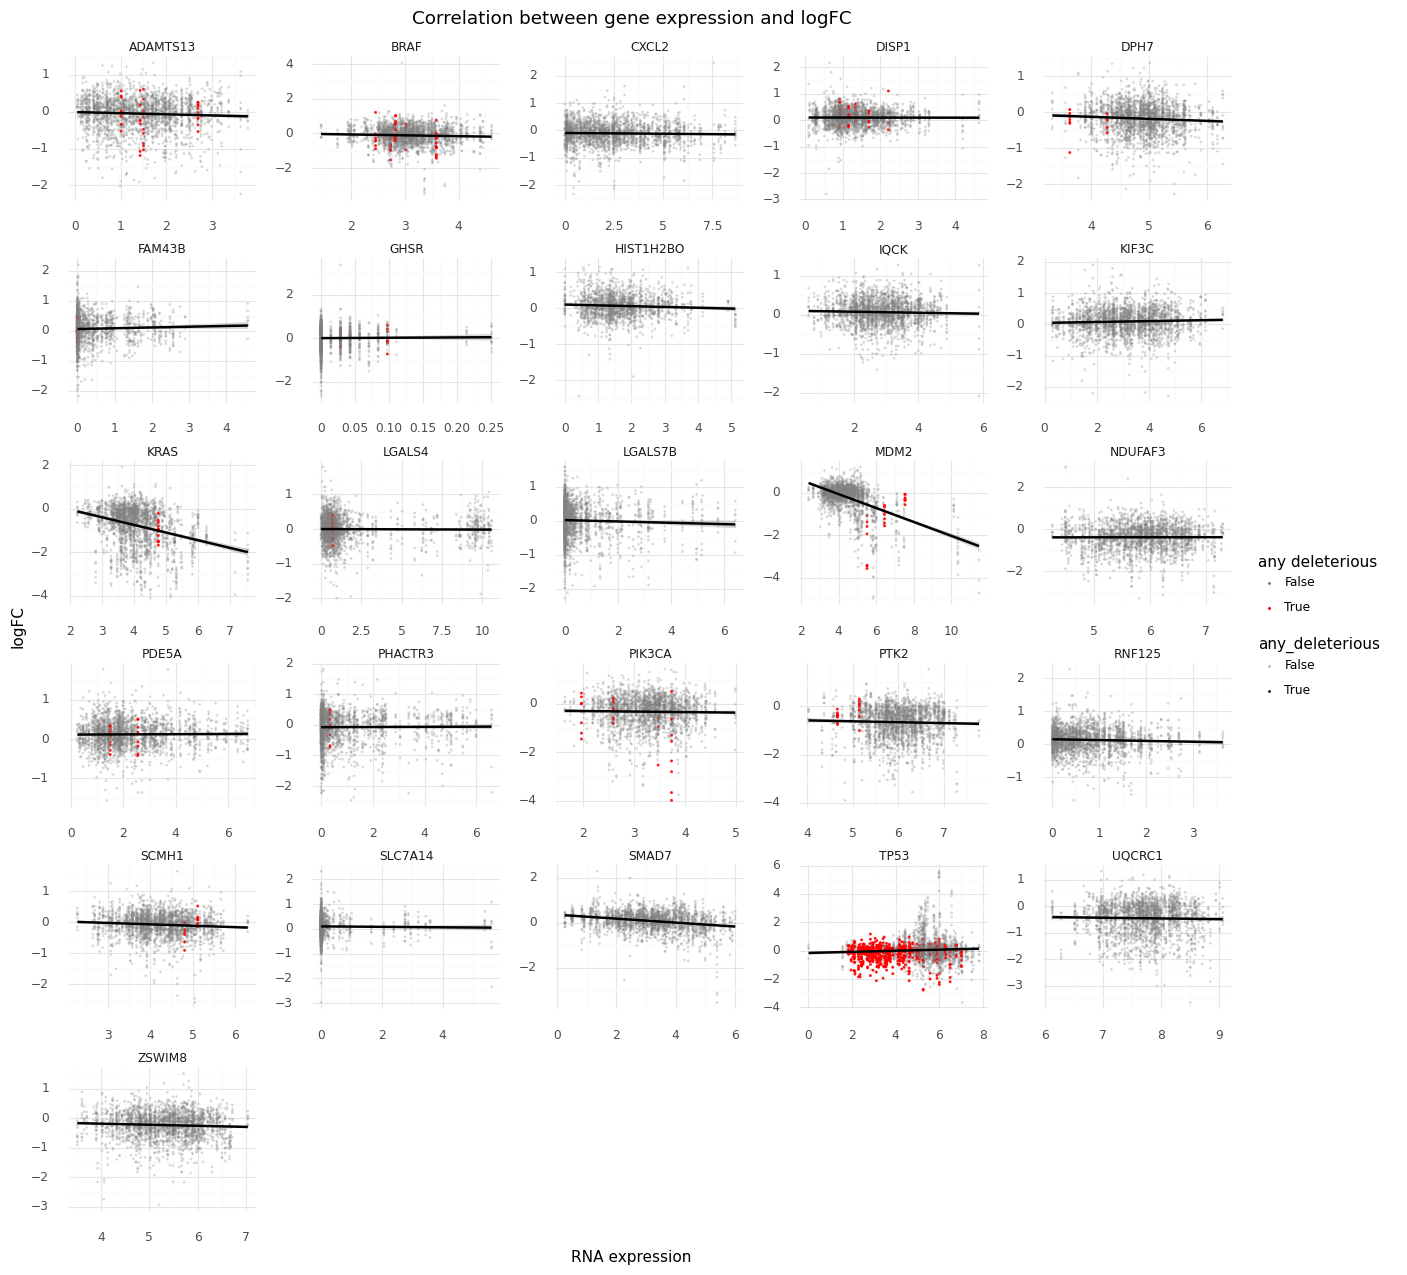

<ggplot: (8759129860214)>

In [18]:
plot_highlight_muts(
    data,
    x="rna_expr",
    x_label="RNA expression",
    title="Correlation between gene expression and logFC",
)

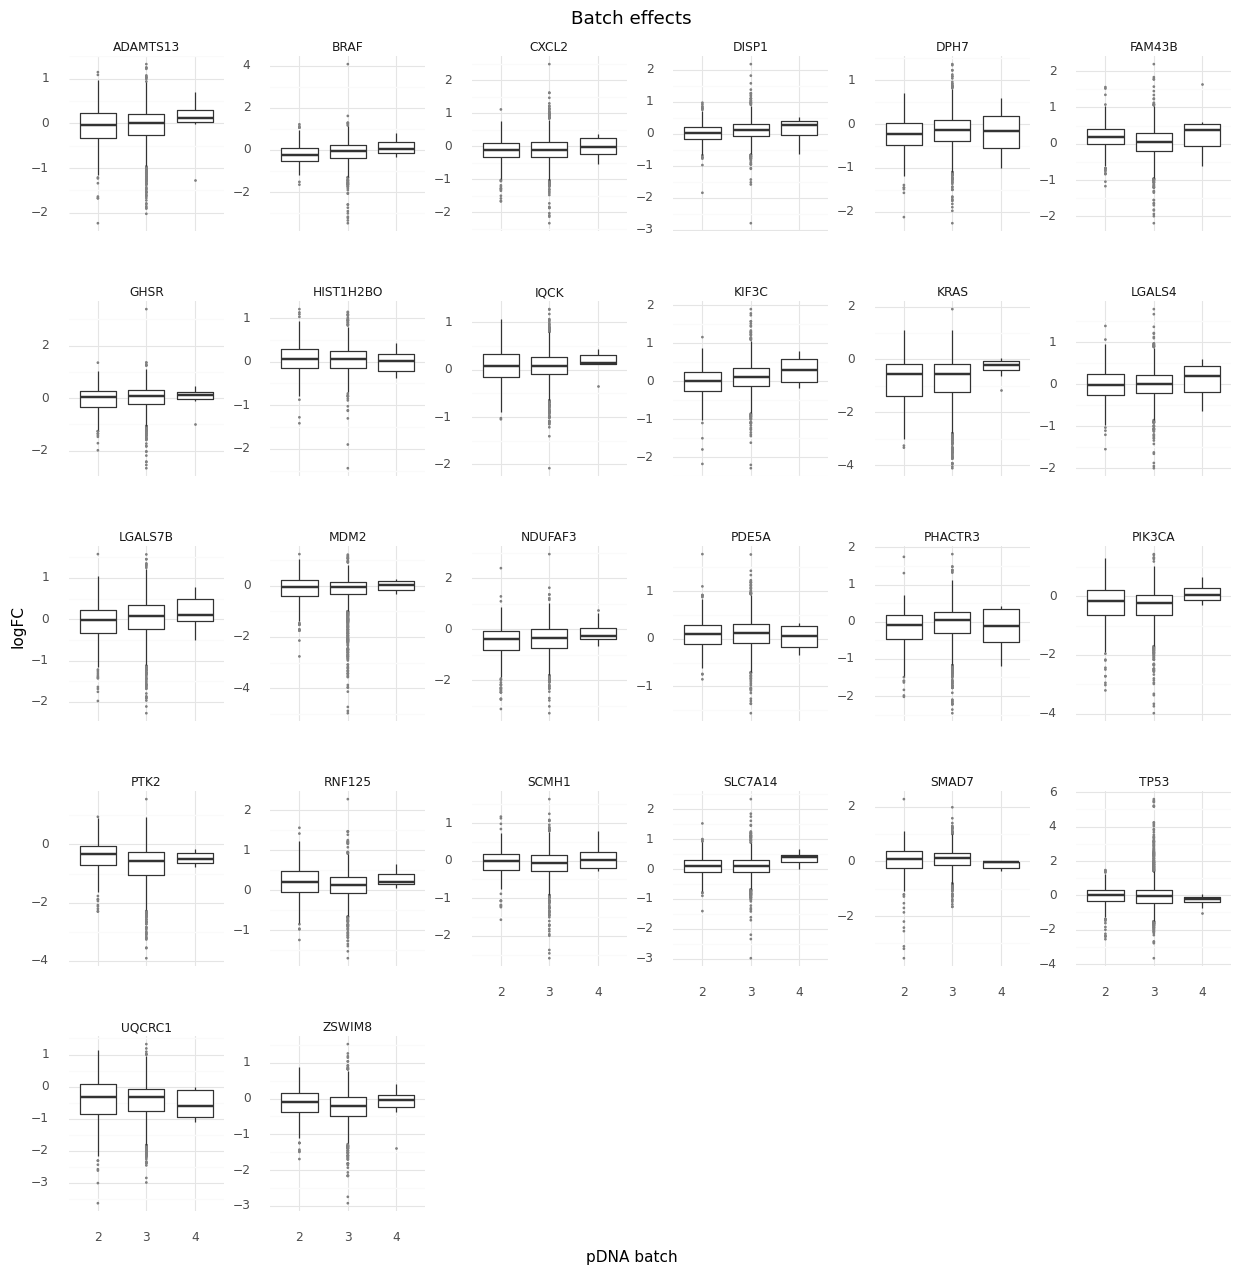

<ggplot: (8759120401592)>

In [19]:
(
    gg.ggplot(data, gg.aes(x="pdna_batch", y="lfc"))
    + gg.facet_wrap("hugo_symbol", nrow=5, scales="free_y")
    + gg.geom_boxplot(outlier_size=0.1, outlier_color="gray")
    + gg.theme(**faceting_theme_dict)
    + gg.labs(x="pDNA batch", y="logFC", title="Batch effects")
)

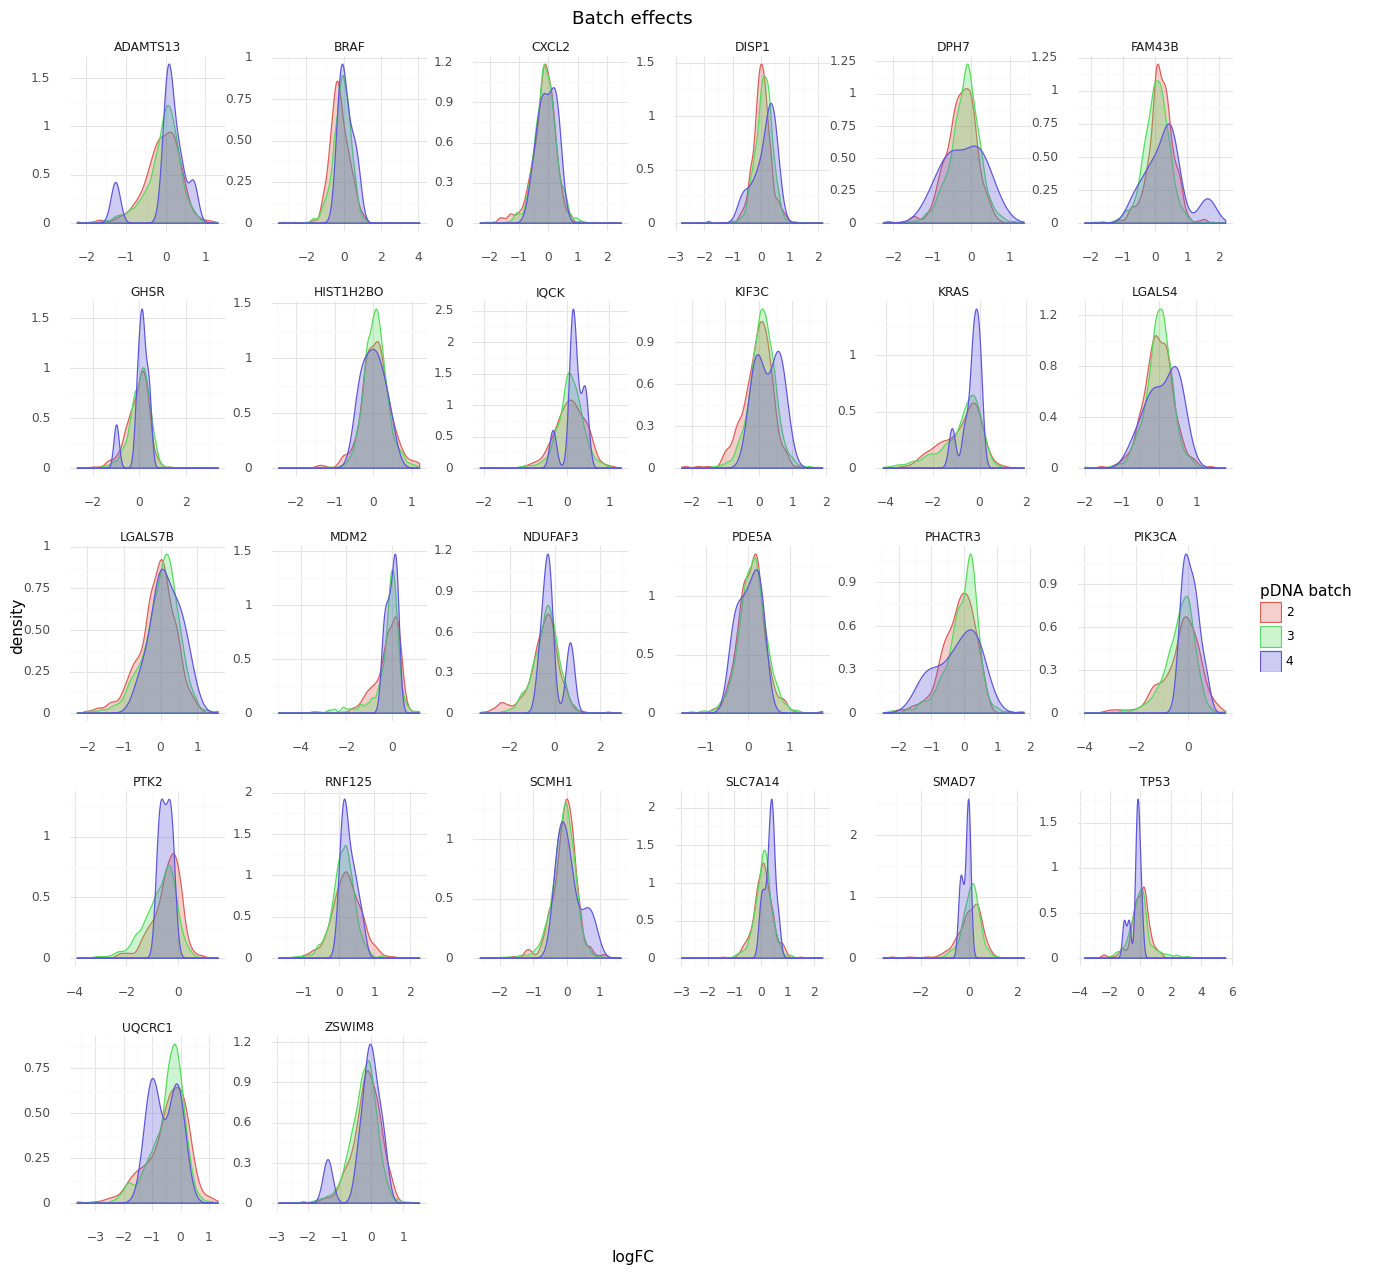

<ggplot: (8759129264731)>

In [23]:
(
    gg.ggplot(data, gg.aes(x="lfc", color="pdna_batch", fill="pdna_batch"))
    + gg.facet_wrap("hugo_symbol", nrow=5, scales="free")
    + gg.geom_density(alpha=0.3)
    + gg.theme(**faceting_theme_dict)
    + gg.labs(
        x="logFC",
        y="density",
        title="Batch effects",
        color="pDNA batch",
        fill="pDNA batch",
    )
)

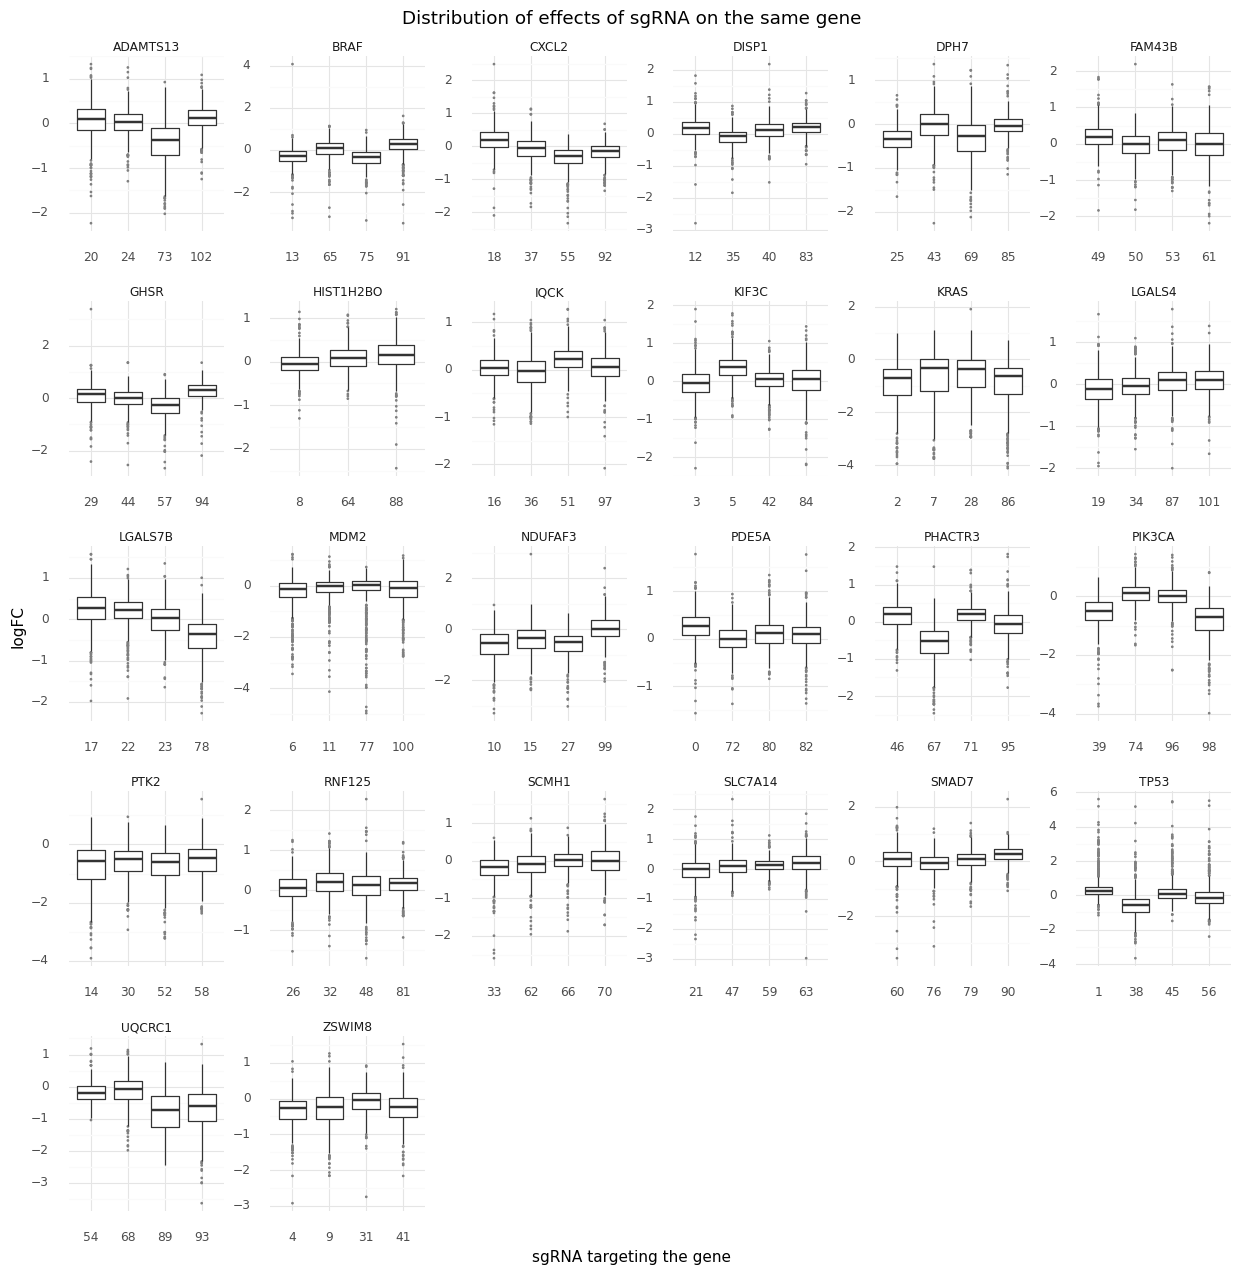

<ggplot: (8759120455705)>

In [21]:
data["sgrna_idx"] = data["sgrna"].cat.codes

(
    gg.ggplot(data, gg.aes(x="factor(sgrna_idx)", y="lfc"))
    + gg.facet_wrap("hugo_symbol", nrow=5, scales="free")
    + gg.geom_boxplot(outlier_size=0.1, outlier_color="gray")
    + gg.theme(**faceting_theme_dict)
    + gg.labs(
        x="sgRNA targeting the gene",
        y="logFC",
        title="Distribution of effects of sgRNA on the same gene",
    )
)

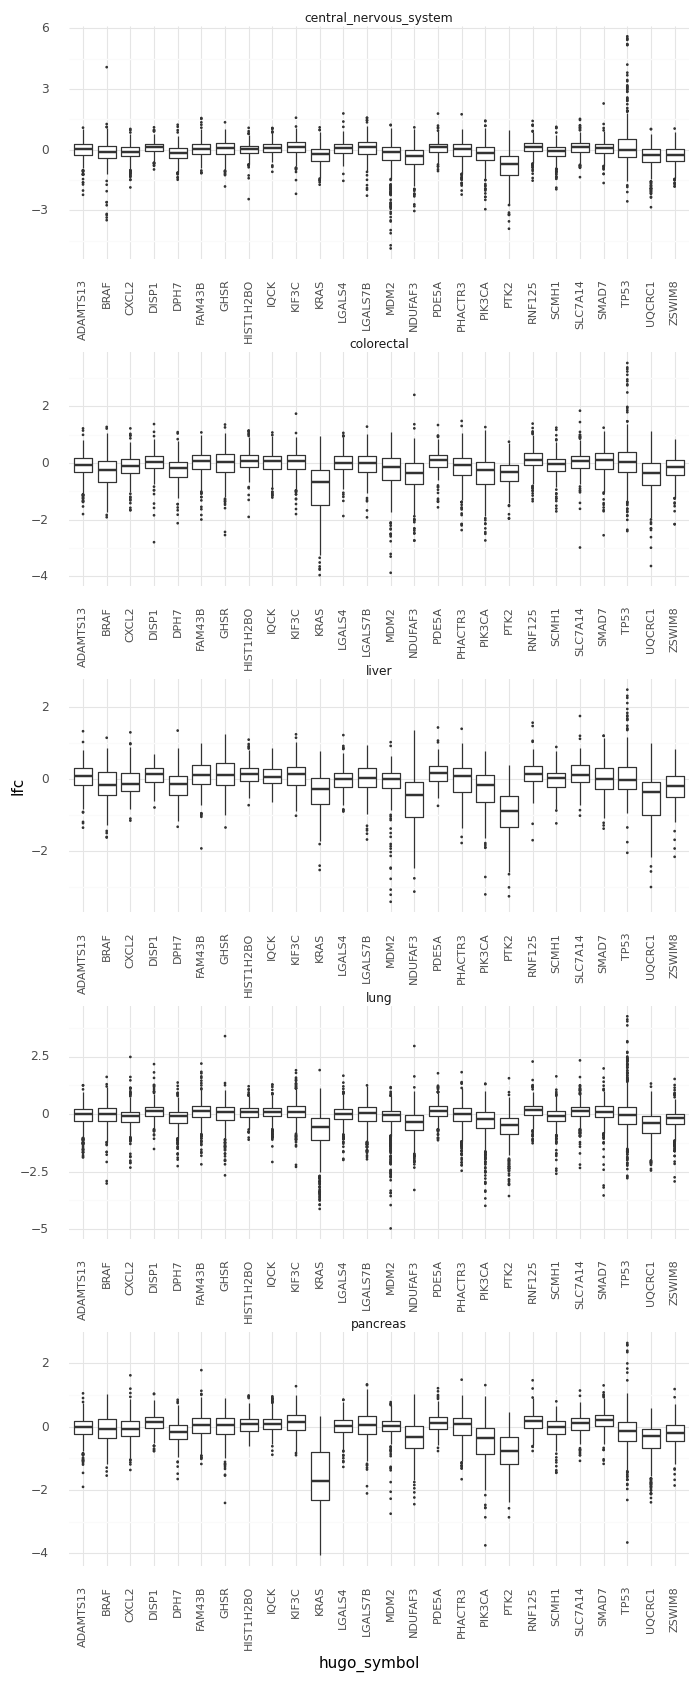

<ggplot: (8759122259188)>

In [27]:
(
    gg.ggplot(data, gg.aes(x="hugo_symbol", y="lfc"))
    + gg.facet_wrap("lineage", ncol=1, scales="free")
    + gg.geom_boxplot(outlier_size=0.1)
    + gg.theme(
        figure_size=(8, 20),
        subplots_adjust={"hspace": 0.4, "wspace": 0.3},
        axis_text_x=gg.element_text(size=8, angle=90, hjust=0.5),
    )
)